In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

2025-04-06 20:51:30.917416: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-06 20:51:30.917820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 20:51:30.920047: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 20:51:30.926917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-06 20:51:30.938457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
data = pd.read_csv("binary-data-diseasefinder_output.csv")

In [3]:
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_122,Symptom_123,Symptom_124,Symptom_125,Symptom_126,Symptom_127,Symptom_128,Symptom_129,Symptom_130,Symptom_131
0,Fungal infection,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4918,Psoriasis,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [4]:
df = pd.DataFrame(data)

# Generate a mapping of diseases to unique float IDs
unique_diseases = df['Disease'].unique()
disease_to_id = {disease: float(i) for i, disease in enumerate(unique_diseases)}

# Replace the disease names in the DataFrame with their corresponding float IDs
df['Disease'] = df['Disease'].map(disease_to_id)

In [5]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_122,Symptom_123,Symptom_124,Symptom_125,Symptom_126,Symptom_127,Symptom_128,Symptom_129,Symptom_130,Symptom_131
0,0.0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,37.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,38.0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4918,39.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [6]:
X = df
y = df.Disease

In [7]:
X = X.drop('Disease', axis=1)

In [8]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
4915    36.0
4916    37.0
4917    38.0
4918    39.0
4919    40.0
Name: Disease, Length: 4920, dtype: float64

In [9]:
X

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,...,Symptom_122,Symptom_123,Symptom_124,Symptom_125,Symptom_126,Symptom_127,Symptom_128,Symptom_129,Symptom_130,Symptom_131
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.32, random_state=15)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=15)

In [12]:
X_train.shape

(3345, 131)

In [13]:
model = Sequential()
model.add(Dense(131, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dense(60, activation='relu'))
#model.add(Dense(60, activation='relu'))
model.add( Dense(41, activation='softmax') )




/home/titi/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# num_classes = len(np.unique(y_train))  
# model.add(Dense(num_classes, activation='softmax'))  

In [15]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
#history = model.fit(X_train, y_train, epochs=10)

Epoch 1/30


/home/titi/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4992 - loss: 3.0521 - val_accuracy: 1.0000 - val_loss: 0.4669
Epoch 2/30
 45/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.3269 

/home/titi/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2420 - val_accuracy: 1.0000 - val_loss: 0.0398
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0158
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 9/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_

In [18]:
y_pred = model.predict(X_test)
probabilities = model.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


In [19]:
y_pred_rounded = np.round(y_pred).astype(int)


In [20]:
#y_pred = model.predict(X_test)
#y_pred
predictions = np.argmax(probabilities, axis=1)


In [21]:
predictions.shape

(1575,)

In [22]:
X_test.shape

(1575, 131)

In [23]:
type(X_test)

pandas.core.frame.DataFrame

In [24]:
new_df = X_test.iloc[[25]].reset_index(drop=True)
new_df

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,...,Symptom_122,Symptom_123,Symptom_124,Symptom_125,Symptom_126,Symptom_127,Symptom_128,Symptom_129,Symptom_130,Symptom_131
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X1_test = new_df

In [26]:
df.iloc[35]

Disease        3.0
Symptom_1      1.0
Symptom_2      0.0
Symptom_3      0.0
Symptom_4      0.0
              ... 
Symptom_127    0.0
Symptom_128    0.0
Symptom_129    0.0
Symptom_130    0.0
Symptom_131    0.0
Name: 35, Length: 132, dtype: float64

In [27]:
X1_test

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,...,Symptom_122,Symptom_123,Symptom_124,Symptom_125,Symptom_126,Symptom_127,Symptom_128,Symptom_129,Symptom_130,Symptom_131
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y_probabilities = model.predict(X1_test)
print(y_probabilities)
y_predictions = np.argmax(y_probabilities, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[4.43695399e-06 5.75222607e-08 1.60169009e-07 4.61024330e-09
  1.21683081e-08 7.45004836e-10 3.41536463e-07 2.03675921e-08
  7.76639697e-10 4.58932936e-06 7.53768816e-08 4.68005579e-10
  1.57021020e-07 1.00832085e-06 2.98925042e-05 4.92182406e-10
  9.99869466e-01 4.65784033e-05 7.01144964e-09 3.72624431e-10
  6.31474563e-07 1.93836627e-07 6.24652607e-10 1.28246977e-08
  9.03259634e-10 2.18753939e-05 8.43824455e-06 7.20950595e-07
  1.48409178e-08 2.68039341e-10 1.43901025e-06 4.01980138e-08
  3.09999160e-09 1.07917415e-07 1.01424916e-06 3.03400398e-08
  7.68476548e-06 6.64295783e-08 2.90594873e-08 8.33015008e-08
  7.80713322e-07]]


In [33]:
print(y_predictions)

[16]


In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 1.0000 - loss: 1.1787e-04
Test Loss: 0.00013484814553521574
Test Accuracy: 1.0


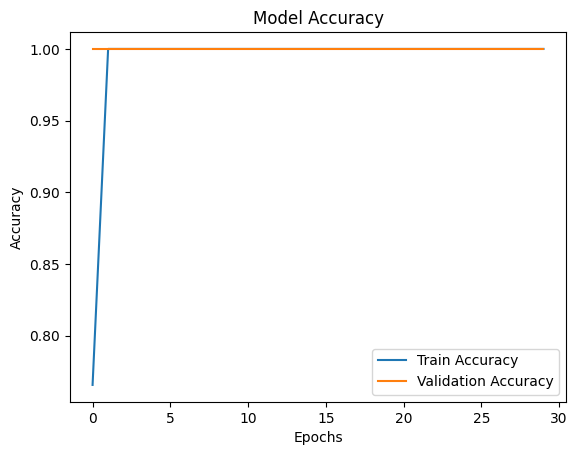

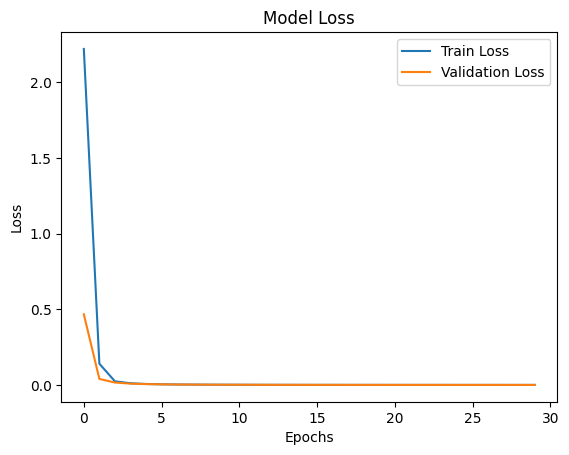

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [32]:
import pickle
pickle_out = open("diseaseFinder_neural_network_2025.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()